# Image Operators And Transforms

Nina Miolane, UC Santa Barbara

<center><img src="figs/02_main.png" width=1200px alt="default"/></center>


# Last Lecture

- **01: Image Formation Models (Ch. 2)**
- 02: Image Operators and Transforms (Ch. 3)
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We have seen how images are formed based on:
- 3D scene elements, 
- camera intrinsic parameters,
- camera extrinsic parameters.

# This Lecture

- 01: Image Formation Models (Ch. 2)
- **02: Image Operators and Transforms (Ch. 3)**
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- 05: 3D Reconstruction (Ch. 13)

We will look at our first image processing operators and transforms, which:
- convert an image into another image,
- make the image more suited to answer a question in the downstream analysis.

# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- **[Fourier Transforms](#sec-ece)**

- [Pyramids and Wavelets](#sec-ece)

# Frequencies in Images

We saw linear neighborhood operators, also called linear filters, that were:
- low-pass filters,
- band-pass and high-pass filters,

and gave an intuitive explanation of it. 

Now, we show how Fourier analysis can give use insights into analyzing:
- the frequencies within images,
- and with this, the frequency characteristics of various filters.


$\color{#EF5645}{\text{Fourier series}}$: Consider a real-valued function $s$ that is integrable on a interval of length $P$. The following expansion of $s$ is called its Fourier series:
$$s_N(x) = \frac{a_0}{2} + \sum_{n=1}^N \left(a_n \cos(2\pi\frac{n}{P}x) + b_n \sin(2\pi\frac{n}{P}x) \right) = \sum_{n=-N}^N c_n \exp(i2\pi\frac{n}{P}x),$$

- $a_n, b_n$ are the Fourier coefficients from the sine-cosine form
- $c_n$ are the Fourier coefficients from the exponential form, also denoted $S[n]$.
- $\omega = 2\pi\frac{n}{P}$ are the (angular) frequencies, unique in $[0, 2\pi]$, 
- $f = \frac{n}{P}$ are the frequencies.

<center><img src="figs/02_fourier_series_1.png" width=300px alt="default"/></center>

<center><img src="figs/02_fourier_series_2.png" width=300px alt="default"/></center>

Can we get the coefficients from the original function, and back? $s \leftrightarrow \{c_n = S[n]\}_n$.

<center><img src="figs/02_fourier_series_2.png" width=300px alt="default"/></center>

# 1D (Continuous) Fourier Transform

$\color{#EF5645}{\text{Fourier analysis}}$: is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. 

$\color{#EF5645}{\text{The Fourier transform }} \mathcal{F}$ of a periodic function, $s_P$ with period P is:

$$\mathcal{F}(s)[n] = S[n]={\frac {1}{P}}\int_{P}s_{P}(t)\cdot e^{-i2 \pi {\frac{n}{P}}t}dt,\quad n\in \mathbb{Z} \quad \text{or}\quad \mathcal{F}(s)[\omega] = S[\omega]={\frac {1}{P}}\int_{P}s_{P}(t)\cdot e^{-i\omega t}dt, \quad \omega = 2\pi\frac{n}{P}, n \in \mathbb{Z}$$  


<center><img src="figs/02_fourier_series_2.png" width=300px alt="default"/></center>

We say that $s$ is defined in real space and $S$ is defined in Fourier space.

# Amplitude and Phase

$\color{#EF5645}{\text{Amplitude and Phase}}$: Fourier transforms are complex-valued in general. As is common with complex numbers, it is often convenient to express them in terms of magnitude $A$ and phase $\phi$: $S[n] = Ae^{iφ}$. Roughly:
- $A$ tells "how much" of a certain frequency component is present,
- $\phi$ tells "where" the frequency component is.


# 1D Inverse Fourier Transform

$\color{#EF5645}{\text{The inverse Fourier transform }} \mathcal{F}^{-1}$ gives the Fourier series that represents $s_P$ as a sum of a potentially infinite number of complex exponential functions, each with an amplitude and phase specified by one of the coefficients:

$$\mathcal{F}^{-1}(S)[t] = s_{P}(t) = \sum _{n=-\infty }^{\infty }S[\omega]\cdot e^{i2\pi {\frac {n}{P}}t} =\sum_{\omega} S[\omega]\cdot e^{i\omega t} .$$


<center><img src="figs/02_fourier_series_2.png" width=300px alt="default"/></center>


# 1D Discrete Fourier Transform (DFT)

When both the function and its Fourier transform are replaced with discretized counterparts, it is called the discrete Fourier transform (DFT).

- The discrete 1D image is an array of size $P$: $[s(0), ..., s(P-1)]$.

$\color{#EF5645}{\text{The discrete Fourier transform (DFT) }} \mathcal{F}$ is:
$$S[n]= \frac{1}{P} \sum_{p=0}^{P-1} s(p)e^{−i 2\pi \frac{n}{P}p} \quad \text{or} \quad S[\omega]= \frac{1}{P} \sum_{p=0}^{P-1} s(p)e^{−i \omega p}.$$

Note that we use $p$ to denote the 1D discrete spatial coordinate here, as opposed to $i, j$, in order to avoid confusion with the imaginary $i$ (sometimes also denoted $j$).


# 2D Fourier Transforms

We have 2 coordinates of space $(x, y)$, and 2 coordinates of frequencies $(ω_x, ω_y)$.


$\color{#EF5645}{\text{2D Fourier Transforms}}$
- Continuous functions: 
$$S[ω_x, ω_y]= \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} s(x, y)e^{-i(ω_xx+ω_yy)}dxdy$$
- Discrete functions: 
$$S[\omega_x, \omega_y]= \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} s(x, y)e^{-i(ω_xx+ω_yy)},$$

where M and N are the width and height of the image.


# Remark on FT Images

$\color{#EF5645}{\text{Remark:}}$ FT images often only consider the magnitude $A$. 

<center><img src="figs/02_ft_image.png" width=300px alt="default"/></center>

The images displayed are horizontal cosines of 8 cycles, where one is shifted laterally from the other by 1/2 cycle, i.e. $\pi$ in phase:
- same FT magnitude images,
- FT phase images would have been different, but we often do not display them.

When we look at a FT image, we only have a partial information!

# Properties of Fourier Transforms

$\color{#6D7D33}{\text{Properties}}$: The Fourier transform has the following properties:
- Linearity: $\mathscr{F}( af_1 + bf_2) = aF_1(u,v) + bF_2(u,v)$
- Scaling: $\mathscr{F}( f(\alpha x, \beta y))= \frac{1}{|\alpha \beta|} F(u/\alpha, v/\beta)$
- Shift:
  - $\mathscr{F}(f(x-\alpha, y-\beta)) = F(u,v) e^{-i2\pi (u\alpha + v\beta)}$,
  - $\mathscr{F}(f(x,y)e^{i 2\pi (u_0\alpha + v_0\beta)}) = F(u-u_0 , v-v_0)$
- Rotation: $\mathscr{F}(\mathscr{F}(f(x,y)))= f(-x, -y)$

where we use $F_1, F_2, F$ to denote the Fourier transforms of $f_1, f_2, f$.


# Convolution Theorem

$\color{#6D7D33}{\text{Theorem}}$: The following result constitutes the Convolution Theorem:
    $$\mathscr{F}(f_1 * f_2) = F_1. F_2$$
    $$ \mathscr{F}(f_1 .f_2) = F_1 * F_2, $$

where we use $F_1, F_2$ to denote the Fourier transforms of $f_1, f_2$.


# 1D Fourier Transform to Analyze Filters

How can we analyze what a given filter does to high, medium, and low frequencies? 

- pass a periodic signal through the filter: $s(p)=e^{i \omega p}$
- observe by how much it is attenuated. 

Convolving $s(p)$ with a filter of kernel $h$ gives : $o(p)= h(p) * s(p) = A_h e^{i2\pi \phi_h}e^{i \omega p }$ with the same frequency but different:
- Magnitude $A$: gain or magnitude of the filter, which is the magnitude of $\mathcal{F}(h)[\omega]$
- Phase $\phi$: shift or phase of the filter, which is the phase of $\mathcal{F}(h)[\omega]$

$\color{#047C91}{\text{Exercise}}$: Show the above assertion (about "eigenfunctions" of convolutions).

# Fourier Transform of a Filter

In this example:
- $S$ has a single nonzero amplitude $A=1$ with $\phi = 0$ at frequency $\omega$
- Sending that signal tells us the value of $\mathcal{F}(h)[\omega]$: 
    - = amplitude $A=A_h$ and phase $\phi = \phi_h$ at frequency $\omega$ for $\mathcal{F}[h]$.

<center><img src="figs/02_sinus.png" width=700px alt="default"/></center>

In general:
- The whole $\mathcal{F}(h)$ tells us which frequencies are amplified or attenuated by the filter.

# Computational Considerations

$\color{#EF5645}{\text{Remark}}$: By denoting DFT the Discrete Fourier Transform:
- At face value, the DFT takes $O(P^2)$ operations (multiply-adds) to evaluate. 
- The algorithm Fast Fourier Transform (FFT) requires only $O(P \log_2 P )$ operations.

for a 1D discrete signal of length $P$.


# 1D Fourier Transforms of Filters

Low-pass filters considered previously, in their 1D version:

<center><img src="figs/02_ft_lowpass.png" width=700px alt="default"/></center>


# 1D Fourier Transforms of Filters

Edge and corner detection filters considered previously, in their 1D version:

<center><img src="figs/02_ft_bandpass.png" width=700px alt="default"/></center>


# 2D Fourier Transforms of Filters

<center><img src="figs/02_ft_low.png" width=600px alt="default"/></center>

# 2D Fourier Transforms of Filters

<center><img src="figs/02_ft_high.png" width=600px alt="default"/></center>


# 2D Fourier Transforms of Filters

<center><img src="figs/02_ft_deriv.png" width=600px alt="default"/></center>


# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

- **[Pyramids and Wavelets](#sec-ece)**

# We Have Seen

- how to modify the image's intensity characteristics:
    - point by point
    - neighborhood by neighbordhood: 
        - led us to convolution and linear filters
- the Fourier transform, explaining what the filters were doing to images.

$\rightarrow$ image is mapped to an image (of the same size) through an operator.

<center><img src="figs/02_main.png" width=500px alt="default"/></center>

<center><img src="figs/02_edges.png" width=500px alt="default"/></center>

# Pyramids of Images

We transform one image into a pyramid of images:

- Upsample or downsample images
  - upsample: might be needed to compare it to another image
  - downsample: for compression
- Pyramid of images, because:
    - additional multiscale
    - useful in practice for multiscale detection
    
    

<center><img src="figs/02_mona_pyr.png" width=400px alt="default"/></center>

<center>Traditional image pyramid: each level has half the resolution (width and height), and hence a quarter of the pixels, of its parent level.</center>

# Interpolation or Upsampling

$\color{#EF5645}{\text{Interpolation}}$ of an image $f$, also called upsampling of $f$, is performed by:
- selecting an upsampling rate $r$ and an "interpolation kernel" $h$,
- convolving the image with it such as:
$$ g(i,j )= \sum_{k,l} f(k, l)h(i − rk,j − rl).$$
$\color{#EF5645}{\text{Remark}}$: This formula is related to the discrete convolution formula, except that we now have $r$ that multiplies $k$ and $l$.

<center><img src="figs/02_upsampling.png" width=400px alt="default"/></center>

# What Kernels Make Good Interpolators?

- Depends on the application and the computational time
- Linear smoothing kernels (e.g. the bilinear kernel) can be used
- Most graphics cards use the bilinear kernel
- Most photo editing packages using bicubic interpolation, with a often set to -1.

<center><img src="figs/02_bicubic.png" width=900px alt="default"/></center>

- High quality interpolator: "windowed sinc function".


# What Kernels Make Good Interpolators?

<center><img src="figs/02_interpolation_tire.png" width=900px alt="default"/></center>


# Decimation or Downsampling

$\color{#EF5645}{\text{Decimation}}$ of an image $f$, also called downsampling, is performed by:
- selecting an downsampling rate $r$ and a low-pass filter $h$,
- convolving the image $f$ with the filter,
- keep every r-th sample (or only evaluate the convolution at every r-th sample):

$$ g(i,j )= \sum_{k,l} f(k, l)h(i − \frac{k}{r},j −\frac{l}{r}).$$

$\color{#EF5645}{\text{Remark}}$: Convolution avoids aliasing (distortion/artifact on a reconstructed signal).

<center><img src="figs/02_downsampling.png" width=600px alt="default"/></center>

# Which Smoothing Kernels are Good Decimators?

- Depends on the application (downstream task, or display to the user) and computational time
- Bilinear filter: commonly used
- Higher quality filter: "windowed sinc"

<center><img src="figs/02_decimation_filters.png" width=750px alt="default"/></center>

# Pyramids

Uses for Pyramids:
- speed-up coarse-to-fine search algorithms, 
- to look for objects or patterns at different scales,
- perform multi-resolution blending operations.
 
 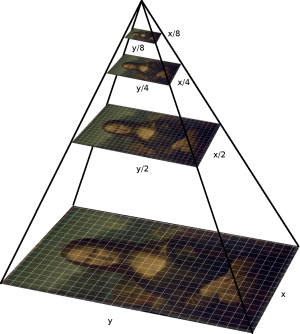

# Pyramids

Two main types in increasing level of complexity:
- Gaussian
- Laplacian

# Gaussian Pyramid

$\color{#003660}{\text{Algorithm:}}$ At each iteration $k$, an operator $G_k$ transforms $g_k$ into image $g_{k+1}$:
1. Convolve the image with a low-pass filter
  - E.g. 4-th binomial filter $b_4 = [1, 4, 6, 4, 1] / 16$, normalized to sum to 1.
2. Subsample by a factor of 2 the result.


$\rightarrow$ generates a sequence of images, subsequent ones being smaller, lower resolution versions of the earlier ones.

<center><img src="figs/02_gaussian_block.png" width=300px alt="default"/></center>

# Gaussian Pyramid

<center><img src="figs/02_gaussian_pyr.png" width=900px alt="default"/></center>

# From Gaussian to Laplacian Pyramid

Gaussian pyramid:
- each level losses some of the fine image details available in the previous level. 

Laplacian pyramid:
- represent, at each level, what is in a Gaussian pyramid image of one level, but not at the level below it.

# Laplacian Pyramid


$\color{#003660}{\text{Algorithm}}$: At each iteration $k$, starting from an image $g_k$:
- Compute $g_{k+1}$ using the block from the Gaussian pyramid,
- Expanding the lower-resolution image $g_{k+1}$ to the same pixel resolution as the neighboring higher-resolution image $g_k$.
- Subtract the two.

<center><img src="figs/02_laplace_block.png" width=220px alt="default"/></center>

# Laplacian Pyramid

<center><img src="figs/02_laplace_pyr0.png" width=500px alt="default"/></center>

<center><img src="figs/02_laplace_pyr1.png" width=1200px alt="default"/></center>

# Laplace Pyramid: Application

<center><img src="figs/02_lap_app0.png" width=1000px alt="default"/></center>



<center><img src="figs/02_lap_app1.png" width=300px alt="default"/></center>

<center><img src="figs/02_lap_app2.png" width=300px alt="default"/></center>

# Towards Wavelets

Gaussian and Laplacian pyramids:
- used extensively in computer vision applications
- a method to represent an image at different scales

Wavelet decompositition
- = an alternative way to represent an image at different scales


# Wavelets

$\color{#EF5645}{\text{Wavelets}}$ are filters that:
- localize a signal in both space and frequency,
- are defined over a hierarchy of scales.

# Drawbacks of Fourier Analysis

- Location information is stored in phases and difficult to extract. 
- The Fourier transform is very sensitive to changes in the function:
    - Change of $O(\epsilon)$ in one point of a discrete function...
    - ...can cause as much as $O(\epsilon)$ change in every Fourier coefficient. 
- Similarly:
    - a change in any one Fourier coefficient... 
    - ...can cause a change of similar magnitude at every point in physical space.




# Wavelets: Definition

$\color{#EF5645}{\text{A wavelet}}$ is a function $\psi$ that satisfies:
- $\int_{-\infty}^{+\infty} \psi(x) dx = 0$
- $\int_{-\infty}^{+\infty} \frac{|\hat \psi(\omega)|^2}{\omega} d\omega = C_\psi < \infty$ where $\hat \psi$ denotes the Fourier transfor|m of $\psi$.

The second condition is necessary to ensure that a function can be reconstructed from a decomposition into wavelets.


# Wavelet Families

$\color{#EF5645}{\text{A wavelet family}}$ is a collection of functions obtained by shifting and dilating the graph of a wavelet. Specifically, a wavelet family with mother wavelet $\psi$ consists of functions $\psi_{a,b}$ of the form:
$$\psi_{a,b}(x) = \frac{1}{\sqrt{a}}\psi\left(\frac{x - b}{a}\right),$$
where:
- $b$ is the shift or center of $\psi_{a, b}$ and $a > 0 $ is the scale.
- If $a > 1$, then $\psi_{a,b}$ is obtained by stretching the graph of $\psi$.
- If $a < 1$, then the graph of $\psi$ is contracted. 
- The value $a$ corresponds to the notion of frequency in Fourier analysis.

# Well-Known Wavelets

- Haar: first wavelet, introduced in 1909.

<center><img src="figs/02_example_haar.jpg" width=700px alt="default"/></center>

# Well-Known Wavelets

- Mexican hat: useful for detection in computer vision.

<center><img src="figs/02_example_mexican.jpg" width=700px alt="default"/></center>

# Other Wavelets

<center><img src="figs/02_more_waves.png" width=700px alt="default"/></center>

# Continuous Wavelet Transform (CWT)

$\color{#EF5645}{\text{The continuous wavelet transform (CWT)}}$ of a function $f$ is defined by:
$$Wf(a, b) = \int_{-\infty}^{+\infty} f(x) \psi_{a, b}(x)dx.$$

The inverse transform is given by:
$$ f(x) = \frac{1}{C_\psi}\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}\frac{1}{|a|^{1/2}}Wf(a, b)\psi_{a, b}(x) da db,$$
where $C_\psi$ is the constant coming from the definition of a wavelet. 



<center><img src="figs/02_fourier_wavelets.jpg" width=600px alt="default"/></center>


# Discrete Wavelet Transform (DWT)

$\color{#EF5645}{\text{The discrete wavelet transform (DWT)}}$ is defined just as the continuous wavelet transform, except only particular values of $a$ and $b$.

For specific values of $a$ and $b$, it can be computed using the Fast Wavelet Transform, developed by Mallat.


# An Orthogonal Family of Wavelets

Given a mother wavelet $\psi$, an orthogonal family of wavelets can be obtained by: 
- Choosing $a = 2^m$ and $b = n 2^m$, where $m$ and $n$ are integers.

With these choices of $a$ and $b$, the DWT is given by:
$$ Wf(m, n) = <\psi_{m, n}, f> = \sum_{k=0}^{p-1} \psi_{m, n}(t_k)f(t_k)$$
where: $\psi_{m, n}(x) = 2^{-m/2}\psi\left( \frac{x - n 2^m}{2^m} \right).$


The inverse transform is given by:
$$ f(x) = \sum_{m, n}\psi_{m,n}(x) Wf(m, n).$$

# Image Operators

- [Point Operators](#sec-syllabus)

- [Neighborhood Operators and Linear Filtering](#sec-ece)

- [Fourier Transforms](#sec-ece)

- [Pyramids and Wavelets](#sec-ece)